In [1]:
import pandas as pd

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('water.csv')

In [5]:
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

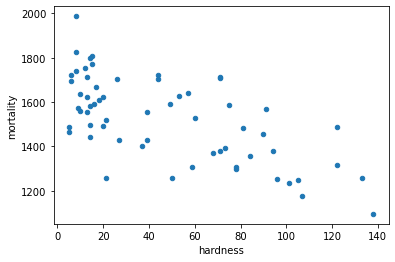

In [6]:
data.plot.scatter(x = 'hardness', y = 'mortality')

In [7]:
#Пирсон
data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [8]:
#Спирмен
data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data[['hardness']], data['mortality'], test_size=0.3, random_state=50)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
k = model.coef_
k

array([-3.43995111])

In [12]:
b = model.intercept_
b

1678.3265982907678

In [13]:
#коэф детерминации на учебных
model.score(X_train, y_train)

0.3589307358630728

In [14]:
#коэф детерминации на тестовых
model.score(X_test, y_test)

0.5403737075686553

In [15]:
#коэф детерминации на всех данных
model.score(data[['hardness']], data['mortality'])

0.425039453386845

In [16]:
y_pred = model.predict(X_test)

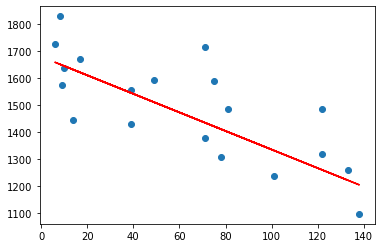

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [18]:
y_rem = y_test - y_pred

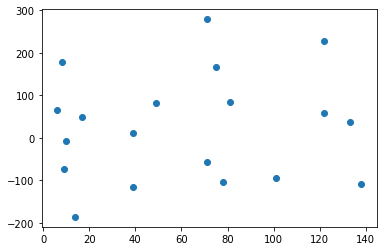

In [19]:
plt.scatter(X_test, y_rem)

In [20]:
y_rem.mean()

26.066147018193377

In [21]:
y_rem.std(ddof=1)
# среднее меньше одного стандартного отклонения, так что модель адекватна

126.78955661929027

In [22]:
#для юга
data_s = data[data.location == 'South']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

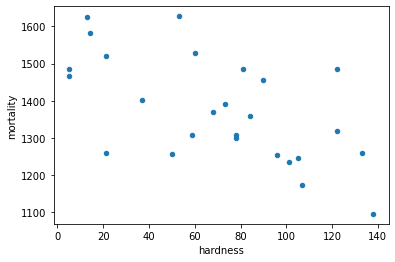

In [23]:
data_s.plot.scatter(x = 'hardness', y = 'mortality')

In [24]:
#Спирмен
data_s[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [25]:
#Пирсон
data_s[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [26]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(data_s[['hardness']], data_s['mortality'], test_size=0.3, random_state=50)
model_s = LinearRegression()
model_s.fit(Xs_train, ys_train)

LinearRegression()

In [27]:
#коэф детерминации на тестовых
model_s.score(Xs_test, ys_test)

0.045758667765418704

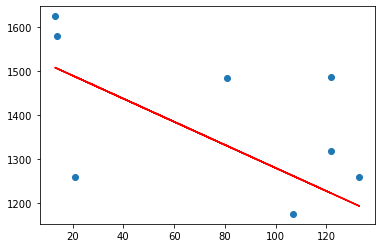

In [28]:
ys_pred = model_s.predict(Xs_test)
plt.scatter(Xs_test, ys_test)
plt.plot(Xs_test, ys_pred, c='r')

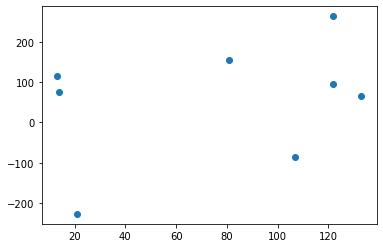

In [29]:
plt.scatter(Xs_test, ys_test - ys_pred)

In [30]:
#для севера
data_n = data[data.location == 'North']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

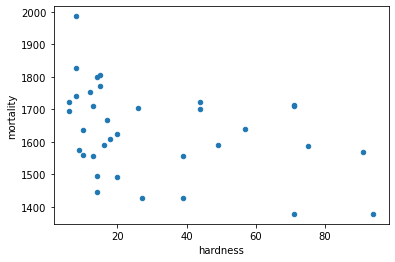

In [32]:
data_n.plot.scatter(x = 'hardness', y = 'mortality')

In [33]:
#Пирсон
data_n[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [34]:
#Спирмен
data_n[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [35]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(data_n[['hardness']], data_n['mortality'], test_size=0.3, random_state=50)
model_n = LinearRegression()
model_n.fit(Xn_train, yn_train)

LinearRegression()

In [36]:
#коэф детерминации на тестовых
model_n.score(Xn_test, yn_test)

0.09277934694062606

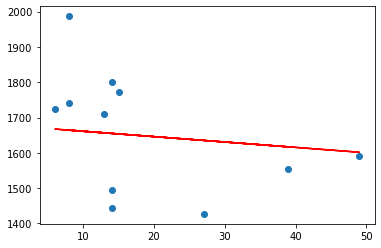

In [37]:
yn_pred = model_n.predict(Xn_test)
plt.scatter(Xn_test, yn_test)
plt.plot(Xn_test, yn_pred, c='r')

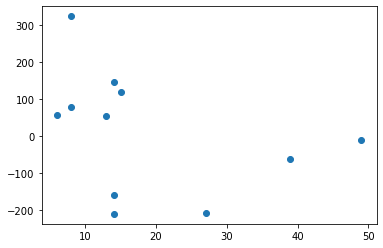

In [38]:
plt.scatter(Xn_test, yn_test - yn_pred)

In [ ]:
#на севере и юге по отдельности анализ хуже. Это связанно с малой выборкой